<a href="https://colab.research.google.com/github/naralakamsani/Daily-task-manage-app/blob/master/bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Data

[Bike Sharing Demand](https://www.kaggle.com/competitions/bike-sharing-demand/overview)


**Load Data**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS7641/Data/bike_sharing_demand/train.csv")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Encode Labeled Data**

In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday_name'] = df['datetime'].dt.weekday

df = df.drop(columns=["datetime", "casual","registered"])

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday_name
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


**Split Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['count'],axis=1), df['count'], test_size=0.2, random_state=1)

In [ ]:
print("Train data size:", len(x_train))
print("Test data size:", len(x_test))

Train data size: 8708
Test data size: 2178


**Scale Data**

In [ ]:
# scaler =  MinMaxScaler()
# x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
# x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_train.columns)

In [ ]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday_name
3224,3,0,1,2,27.88,31.820,89,19.9995,2011,8,4,6,3
1299,1,0,0,2,24.60,31.060,53,16.9979,2011,3,19,0,5
3489,3,0,1,1,24.60,27.275,88,16.9979,2011,8,15,7,0
7649,2,0,1,1,19.68,23.485,67,8.9981,2012,5,18,2,4
5950,1,0,0,1,9.84,14.395,75,0.0000,2012,2,4,3,5


# Plots

**Learning Curve**

In [ ]:
def plot_learning_curve(estimator, title, x, y, cv=10, n_jobs=-1, train_sizes=[0.1,0.25,0.4,0.65,0.8,1], scoring='root_mean_squared_error'):
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("RMSE")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross validfation score")

    plt.legend(loc="best")
    return plt

In [ ]:
def plot_validation_curve(estimator, title, x, y, param_name, param_range, cv=10, n_jobs=-1, scoring='root_mean_squared_error'):
    plt.figure()
    plt.title(title)

    plt.xlabel(param_name)
    plt.ylabel("accuracy")
    train_scores, test_scores = validation_curve(estimator, x, y, scoring=scoring, cv=cv, n_jobs=n_jobs,param_name=param_name, param_range=param_range)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross validfation Accuracy")

    plt.legend(loc="best")
    return plt

In [ ]:
def plot_model_times_and_performance(estimator, title, x, y, cv=10, n_jobs=-1, train_sizes=[0.1,0.25,0.4,0.65,0.8,1], scoring="accuracy"):
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross validfation Accuracy")

    plt.legend(loc="best")
    return plt

In [ ]:
def get_model_performance_info(estimator, title, x, y, cv=10, n_jobs=-1, train_sizes=[0.1,0.25,0.4,0.65,0.8,1], scoring="accuracy"):
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross validfation Accuracy")

    plt.legend(loc="best")
    return plt

# Decision Tree

In [ ]:
plot_validation_curve(DecisionTreeRegressor(random_state=1), "Learning Curve (Decision Tree)", x_train, y_train, param_range=np.arange(1, 21), param_name="max_depth")
plt.show()

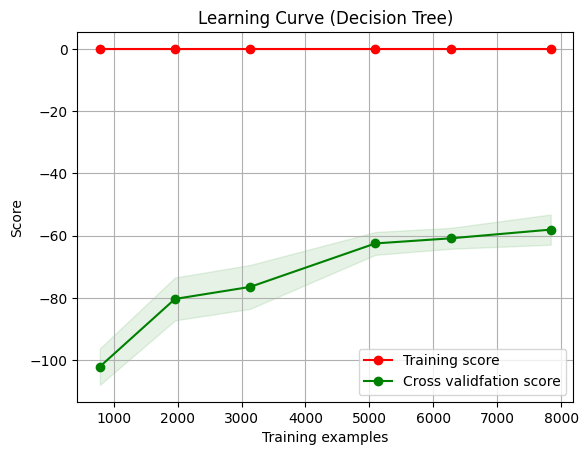

In [ ]:
plot_learning_curve(DecisionTreeRegressor(random_state=1), "Learning Curve (Decision Tree)", x_train, y_train)
plt.show()

In [ ]:
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
y_pred = dt_model.predict(x_test)
print('Test Set RMSE:', np.sqrt(np.mean((y_test-y_pred)**2)))

Test Set RMSE: 56.560510678632774
Test Set RMSLE: 0.4243545020220735


#Neural Network


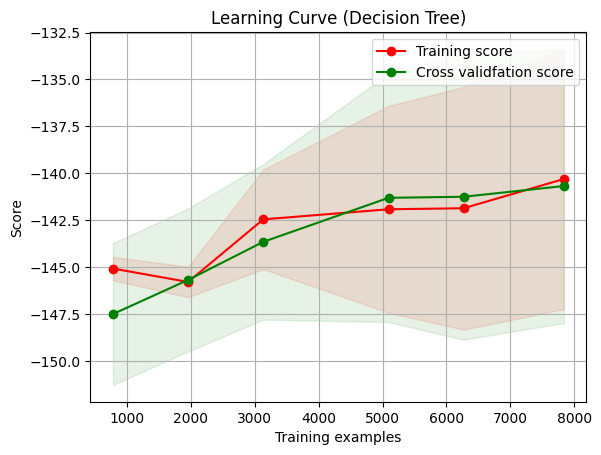

In [ ]:
plot_learning_curve(MLPRegressor(random_state=1), "Learning Curve (Neural Network)", x_train, y_train)
plt.show()

In [ ]:
mlp=MLPRegressor(
    activation="relu",
    max_iter=3000,
    validation_fraction=0.2,
    early_stopping=True)

mlp.fit(x_train, y_train)

MLPRegressor(early_stopping=True, max_iter=3000, validation_fraction=0.2)

Test Set RMSE: 56.560510678632774


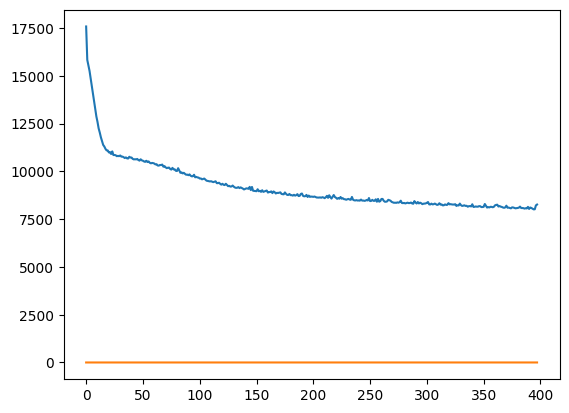

In [ ]:
y_pred = dt_model.predict(x_test)
print('Test Set RMSE:', np.sqrt(np.mean((y_test-y_pred)**2)))
plt.plot(mlp.loss_curve_)
plt.plot(mlp.validation_scores_)

In [ ]:
nn_model = MLPRegressor(random_state=1)
nn_model.fit(x_train, y_train)

MLPRegressor(random_state=1)

In [ ]:
y_pred = dt_model.predict(x_test)
print('Test Set RMSE:', np.sqrt(np.mean((y_test-y_pred)**2)))

Test Set RMSE: 56.560510678632774
Test Set RMSLE: 0.4243545020220735


#Boosting


In [ ]:
plot_validation_curve(GradientBoostingRegressor(random_state=1), "Validation Curve (Boosting)", x_train, y_train, param_name="n_estimators", param_range=np.arange(1, 101, 10))
plt.show()

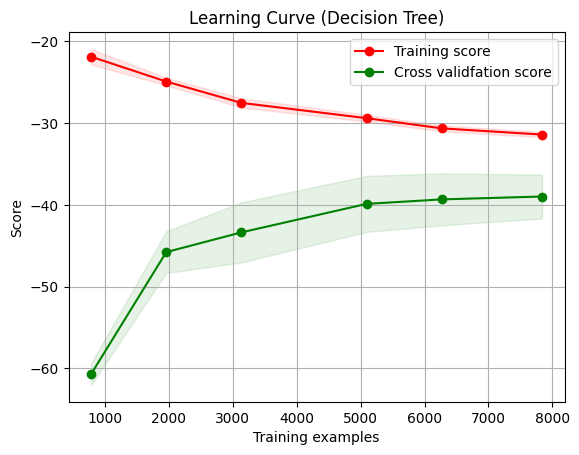

In [ ]:
plot_learning_curve(GradientBoostingRegressor(random_state=1), "Learning Curve (Boosting)", x_train, y_train)
plt.show()

In [ ]:
boosting_model = GradientBoostingRegressor(random_state=1)
boosting_model.fit(x_train, y_train)

HistGradientBoostingRegressor(random_state=1)

In [ ]:
y_pred = boosting_model.predict(x_test)
y_pred[y_pred<0] = 0
print('Test Set RMSE:', np.sqrt(np.mean((y_test-y_pred)**2)))

Test Set RMSE: 38.10756873871705
Test Set RMSLE: 0.4183073866658972


#Support Vector Machine

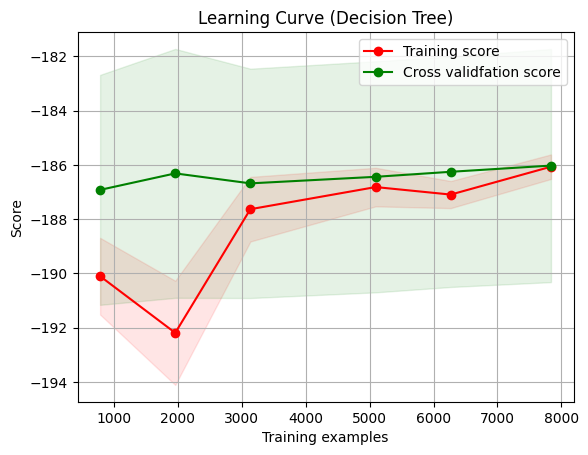

In [ ]:
plot_learning_curve(SVR(), "Learning Curve (Support Vector Machine))", x_train, y_train)
plt.show()

In [ ]:
sv_model = SVR()
sv_model.fit(x_train, y_train)

SVR()

In [ ]:
y_pred = sv_model.predict(x_test)
print('Test Set RMSE:', np.sqrt(np.mean((y_test-y_pred)**2)))

Test Set RMSE: 192.35893924587705
Test Set RMSLE: 1.4666218422333923


#k-Nearest Neighbor

In [ ]:
plot_validation_curve(KNeighborsRegressor(), "Validation Curve (k-Nearest Neighbor)", x_train, y_train, param_range=np.arange(1, 21), param_name="n_neighbors")
plt.show()

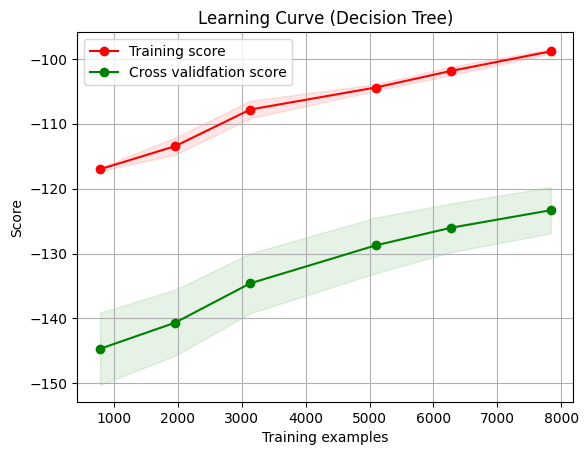

In [ ]:
plot_learning_curve(KNeighborsRegressor(), "Learning Curve (k-Nearest Neighbor)", x_train, y_train)
plt.show()

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn_model.predict(x_test)
print('Test Set RMSE:', np.sqrt(np.mean((y_test-y_pred)**2)))

Test Set RMSE: 127.31519882981848
Test Set RMSLE: 0.9450705401936519


#Submission

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/CS7641/Data/bike_sharing_demand/test.csv")

test_df["datetime"] = pd.to_datetime(test_df["datetime"])

test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour
test_df['weekday_name'] = test_df['datetime'].dt.weekday

test_df = test_df.drop(columns=["datetime"])

# test_df = pd.DataFrame(scaler.fit_transform(test_df), columns=x_train.columns)

y_pred = boosting_model.predict(x_test)
print('Test Set RMSLE:', np.sqrt(np.mean((np.log1p(y_test) - np.log1p(y_pred))**2)))

submission_pred = boosting_model.predict(test_df)

submission = pd.read_csv("/content/drive/MyDrive/CS7641/Data/bike_sharing_demand/sampleSubmission.csv")

submission_pred[submission_pred<0] = 0

submission['count']= submission_pred

submission.to_csv('/content/drive/MyDrive/CS7641/Data/bike_sharing_demand/submission.csv', index=False)